In [1]:
%matplotlib inline

width = 6
height = 3
import matplotlib
matplotlib.rcParams['figure.figsize'] = [width, height]

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hmmlearn

from hmmlearn.hmm import GaussianHMM

## data

In [2]:
nile = pd.read_csv("Nile.csv", index_col = 0)

In [3]:
nile.head()

,year,val
1,1871,1120
2,1872,1160
3,1873,963
4,1874,1210
5,1875,1160


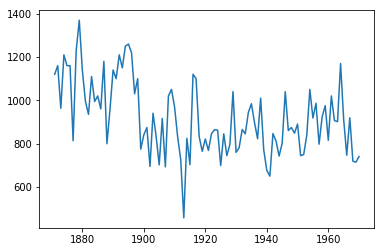

In [4]:
plt.plot(nile.year, nile.val)

In [5]:

def fitHMM(vals, n_states):
    vals = np.reshape(vals,[len(vals),1])
    
    # fit Gaussian HMM to Q
    model = GaussianHMM(n_components=n_states, n_iter=100).fit(vals)
     
    # classify each observation as state 0 or 1
    hidden_states = model.predict(vals)
 
    # fit HMM parameters
    mus = np.squeeze(model.means_)
    sigmas = np.squeeze(np.sqrt(model.covars_))
    transmat = np.array(model.transmat_)
    print(mus)
    print(sigmas)
    # re-order parameters in ascending order of mean of underlying distribution
    idx      = np.argsort(mus)
    mus      = mus[idx]
    sigmas   = sigmas[idx]
    transmat = transmat[idx, :][:, idx]
    
    state_dict = {}
    states = [i for i in range(n_states)]
    for i in idx:
        state_dict[i] = states[idx[i]]
    
    relabeled_states = [state_dict[h] for h in hidden_states]
    return (relabeled_states, mus, sigmas, transmat, model)

In [6]:
hidden_states, mus, sigmas, transmat, model = fitHMM(nile.val.values, 3)

[ 796.06732375 1097.27216026  884.87213564]
[ 67.19550566 133.0357056  138.81884828]


## Exercise: How might we be able to plot this more sensibly? 

In [7]:
def plot_states(ts_vals, states, time_vals):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Year)')
    ax1.set_ylabel('Nile river flow',         color=color)
    ax1.plot(time_vals, ts_vals,      color=color)
    ax1.tick_params(axis='y',            labelcolor=color)

    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('Hidden state', color=color)  
    ax2.plot(time_vals,states,     color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  
    plt.show()

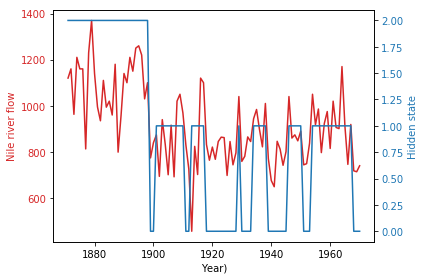

In [8]:
plot_states(nile.val, hidden_states, nile.year)

## Exercise: how can we modify the above analysis to make it more meaningful?

In [14]:
np.where(hidden_states == 10)

(array([], dtype=int64),)

In [15]:
hidden_states, mus, sigmas, transmat, model = fitHMM(nile.val.values, 3)


[ 884.87213564  796.06732375 1097.27216026]
[138.81884828  67.19550566 133.0357056 ]


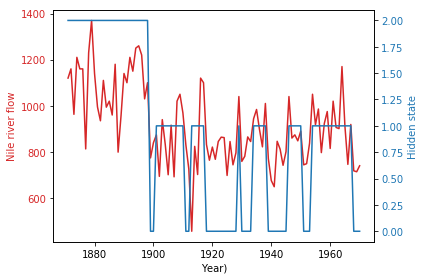

In [16]:
plot_states(nile.val, hidden_states, nile.year)

In [17]:
mus

array([ 796.06732375,  884.87213564, 1097.27216026])

In [15]:
np.set_printoptions(precision = 3, suppress = True)

In [16]:
transmat

array([[0.508, 0.492, 0.   ],
       [0.305, 0.695, 0.   ],
       [0.036, 0.   , 0.964]])

In [17]:
mus

array([ 796.067,  884.872, 1097.272])

## Exercise: generate new synthetic data from the model and then fit it with a fresh HMM model

In [18]:
res = np.squeeze(model.sample(1000)[0])

In [19]:
hidden_states, mus, sigmas, transmat, model = fitHMM(res, 3)

[ 791.61323618 1166.60016482  897.18381068]
[ 64.63947362 124.51386601 135.29512545]


In [20]:
res.shape

(1000,)

In [21]:
len(hidden_states)

1000

In [22]:
def plot_states_no_time(ts_vals, states):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Time)')
    ax1.set_ylabel('Value',        color=color)
    ax1.plot(ts_vals,              color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('Hidden state', color=color)  
    ax2.plot(states,        color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  
    plt.show()

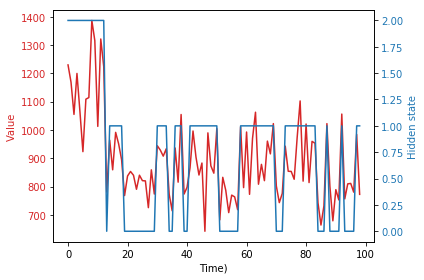

In [23]:
plot_states_no_time(res[1:100], hidden_states[1:100])

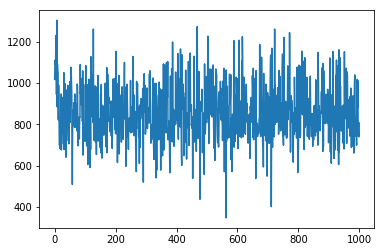

In [36]:
plt.plot(res)

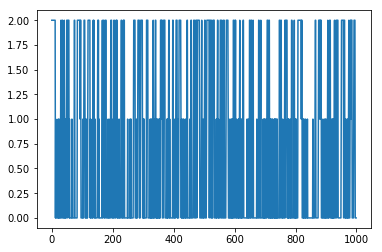

In [37]:
plt.plot(hidden_states)

In [38]:
transmat

array([[0.493, 0.352, 0.155],
       [0.488, 0.101, 0.411],
       [0.347, 0.203, 0.45 ]])

In [39]:
hidden_states, mus, sigmas, transmat, model = fitHMM(res, 3)

[951.375 799.138 832.696]
[118.459  64.824 161.803]


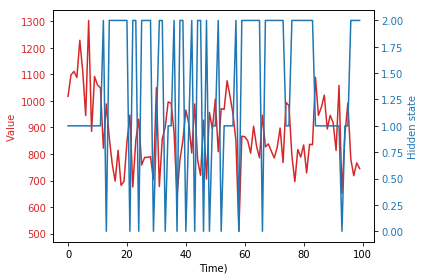

In [40]:
plot_states_no_time(res[:100], hidden_states[:100])

In [41]:
transmat

array([[0.493, 0.351, 0.156],
       [0.488, 0.099, 0.413],
       [0.347, 0.203, 0.45 ]])